#### TAREA 1/ MATEO PARRA MENA/ 2021429077/ 24-04-25

#### <u> Preguntas y Respuestas:</u> 

1. Cargar la base de datos en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario.
   
R: Se cargó la base machine_failure_data.csv y se transformó la variable objetivo Failure_today a binaria (1 si hay fallo, 0 si no). Se identificaron los tipos de datos: principalmente variables numéricas (float64, int64), una variable de fecha (datetime64) y algunas categóricas (object), como las direcciones del viento. Se realizó un análisis exploratorio que reveló variables con altos niveles de valores faltantes, en particular Electricity (42.3%) y Evaporation (37.5%), y otras como Parameter5_9am con un porcentaje menor a 10%. Por ello, se decidió eliminar filas con NaN solo para variables con menos del 10% de datos faltantes.
Adicionalmente:

-Se eliminaron directamente las columnas Parameter6_9am y Parameter6_3pm por tener más del 35% de datos faltantes.    

-Las variables de dirección cardinal fueron transformadas a ángulos y luego agrupadas en las regiones N, E, S y W.

-Estas nuevas categorías fueron convertidas en dummies (variables ficticias) para usarlas en los modelos.

-Se generaron variables dummy para la variable Location.

-Se añadió información estacional a partir de la fecha, creando variables indicadoras para las estaciones del año (Summer, Autumn, Winter, Spring).

-La variable Leakage fue eliminada más adelante por ser un predictor perfecto del fallo, con un R² cercano a 1 que distorsiona los modelos predictivos

-Se realizaron estadísticas descriptivas y gráficos de distribución para variables como Evaporation, Electricity, Min_Temp, Max_Temp, y varios parámetros horarios. Los gráficos permitieron visualizar la distribución de los datos y la presencia de outliers, como fue el caso de Evaporation (distribución sesgada a la derecha) y Leakage, que mostró valores extremos. También se construyó una matriz de correlación excluyendo las dummies de Location y Season para evitar confusión visual. Se descartaron variables redundantes por correlación como Parameter7_9am, Parameter7_3pm y Parameter5_9am.



2. Ejecute un modelo de probabilidad lineal (MCO) que permita explicar la probabilidad de que un dia se reporte fallo medido por sensor, a partir de las informacion disponible. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

R:
-Para modelar la probabilidad de que en un día se reporte una falla, se utilizó un modelo de regresión lineal clásico (OLS) donde la variable dependiente es binaria (Failure_today: 1 si hubo falla, 0 en caso contrario). Se seleccionaron como variables explicativas tanto factores climáticos como operacionales, incluyendo temperatura mínima y máxima, presión atmosférica, velocidad del viento, y variables categóricas transformadas a dummies como estación del año y región del viento.

-El modelo alcanza un R^2 de 0.280, lo que implica que aproximadamente el 28% de la variabilidad en la ocurrencia de fallas puede explicarse linealmente por las variables independientes incluidas. 

-Entre las variables incluidas, se destacaron Min_Temp, Max_Temp, Parameter1_Speed, Parameter4_9am, y Parameter5_3pm. Se encontraron asociaciones positivas de Min_Temp y Parameter1_Speed con la probabilidad de falla, y negativas para Max_Temp y Parameter5_3pm. Las dummies de dirección cardinal mostraron efectos significativos, especialmente las provenientes del sur y oeste, lo que podría vincularse a patrones climáticos adversos. Este modelo, sin embargo, tiene limitaciones: asume varianza constante (homocedasticidad), no restringe las predicciones al intervalo [0, 1], y no captura relaciones no lineales inherentes a variables binarias.

-Finalmente, las dummies de estación como Season_Spring y Season_Summer fueron positivas y significativas, lo que respalda la presencia de estacionalidad en las fallas. Esto es consistente con la teoría vista en clases sobre la necesidad de incorporar efectos fijos temporales cuando hay patrones cíclicos.


3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.
   
R:-El modelo Probit permitió estimar la probabilidad de falla diaria de manera no lineal, ajustándose mejor a las restricciones del modelo (predicciones entre 0 y 1). Para evitar problemas de matriz singular durante su estimación, se excluyeron las variables Electricity y Evaporation.

-Los resultados muestran que la temperatura mínima se relaciona positivamente con la probabilidad de falla, lo que sugiere que, a medida que aumentan las temperaturas mínimas, podrían generarse condiciones menos óptimas para el funcionamiento del equipo. En contraste, temperaturas máximas más altas reducen la probabilidad de falla, posiblemente por asociarse a ambientes más secos o estables. También se observa que velocidades más altas del parámetro operacional principal están relacionadas con un mayor riesgo de falla, lo que puede explicarse por una mayor exigencia sobre el sistema.

-En relación a los factores ambientales, las direcciones del viento provenientes del sur y del oeste aumentan la probabilidad de fallo, lo que puede indicar que ciertas corrientes de aire o condiciones específicas generan mayor estrés sobre los sensores o componentes de la máquina. Además, se evidencian efectos sistemáticos según la ubicación geográfica de los equipos: varias ubicaciones mostraron ser significativamente distintas en términos de riesgo, lo cual sugiere diferencias operativas o de mantenimiento entre sitios.

-Las estaciones del año también fueron significativas, especialmente primavera y verano, las cuales mostraron un aumento en la probabilidad de fallas. Esto puede vincularse a cambios estacionales en la carga operativa o condiciones térmicas más agresivas

-Para facilitar la interpretación se calcularon los efectos marginales (dy/dx), que representan el cambio en la probabilidad de falla por una variación unitaria en la variable independiente, manteniendo las demás constantes. Por ejemplo, Min_Temp tuvo un efecto marginal de aproximadamente 0.022, lo que significa que un aumento de un grado en la temperatura mínima eleva la probabilidad de falla en 2.2 puntos porcentuales. Estos efectos marginales permiten cuantificar de forma intuitiva el impacto de cada variable en términos de probabilidad, lo cual es particularmente útil en aplicaciones prácticas como mantenimiento predictivo o análisis de riesgo operacional.


4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

-Se estimó un modelo Logit para explicar la probabilidad de que un día ocurra una falla registrada por el sensor, utilizando como variable dependiente Failure_today y como variables independientes aquellas previamente seleccionadas tras el proceso de limpieza y transformación de la base. Las variables Electricity y Evaporation fueron excluidas por generar colinealidad y problemas de matriz singular en los modelos no lineales.

-Los resultados del modelo Logit fueron coherentes con los obtenidos previamente en los modelos MCO y Probit. La variable Min_Temp presentó un coeficiente positivo y altamente significativo, lo que indica que temperaturas mínimas más altas están asociadas con una mayor probabilidad de falla. Por el contrario, Max_Temp mostró un efecto negativo, lo que sugiere que condiciones más cálidas podrían favorecer el desempeño de los equipos al reducir humedad o condensación.

-Asimismo, Parameter1_Speed tuvo un impacto positivo significativo, lo que refuerza la hipótesis de que mayores velocidades operativas incrementan la exigencia sobre los sistemas mecánicos, elevando el riesgo de falla. También se observó un patrón horario en Parameter3_9am (positivo) y Parameter3_3pm (negativo), lo que puede reflejar condiciones distintas de operación o ambiente a lo largo del día.

-Respecto a las direcciones cardinales del viento, se observó que las provenientes del oeste (Parameter1_Dir_region_W, Parameter2_9am_region_W, Parameter2_3pm_region_W) y del sur (Parameter2_9am_region_S, Parameter2_3pm_region_S) aumentan la probabilidad de falla, y todos estos efectos fueron altamente significativos. Esto podría relacionarse con patrones climáticos regionales que afectan negativamente el funcionamiento de la maquinaria.

-Las variables dummy de Location mostraron una fuerte heterogeneidad entre estaciones, revelando diferencias significativas en el riesgo de falla según ubicación, posiblemente debido a variaciones locales en mantenimiento, exposición ambiental o carga operativa. Algunas locaciones como la 6, 13, 20 y 49 presentaron coeficientes negativos muy pronunciados, lo cual indica una menor probabilidad de falla respecto al grupo base.

-Las estaciones del año también fueron significativas. En particular, Spring y Summer mostraron coeficientes positivos y altamente significativos, lo que sugiere una mayor frecuencia de fallas en esos períodos. Winter, en cambio, tuvo un efecto negativo. A diferencia del modelo anterior, esta vez sí se reportaron errores estándar válidos, lo que permite interpretar estas relaciones con mayor confianza estadística.

-Finalmente, se calcularon los efectos marginales (dy/dx), los cuales cuantifican el cambio esperado en la probabilidad de falla ante una variación unitaria en cada variable independiente, manteniendo constantes las demás. Por ejemplo, el efecto marginal de Min_Temp fue de aproximadamente 0.022, lo que implica que un aumento de un grado en la temperatura mínima incrementa la probabilidad de falla en 2.2 puntos porcentuales. Esta interpretación directa es especialmente útil para fines prácticos y para comunicar hallazgos a tomadores de decisiones técnicos o no técnicos.

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

-Los tres modelos estimados MCO, Probit y Logit arrojaron resultados en general consistentes en cuanto a la significancia estadística y el signo de los coeficientes, lo cual refuerza la robustez de ciertas variables explicativas clave. No obstante, existen diferencias relevantes en la forma en que cada modelo interpreta y modela la relación entre las variables independientes y la probabilidad de falla diaria (Failure_today), que es una variable binaria.

-El modelo MCO, aunque es simple e intuitivo, tiene limitaciones importantes en este contexto. Su principal fortaleza es que permite interpretar los coeficientes directamente como cambios en la probabilidad ante una unidad de cambio en cada predictor. Sin embargo, viola supuestos fundamentales del análisis de variables binarias: puede predecir probabilidades fuera del rango [0,1], asume homocedasticidad, y no captura no linealidades inherentes al fenómeno. Aun así, sirve como punto de partida para validar la dirección e importancia relativa de los efectos.

-El modelo Probit mejora esta situación modelando la probabilidad de manera no lineal, utilizando la distribución normal estándar acumulada. Esto asegura que las predicciones estén contenidas en el intervalo [0,1]. Los coeficientes no se interpretan directamente como cambios porcentuales, pero se pueden interpretar a través de sus efectos marginales (dy/dx). En este caso, por ejemplo, un aumento de 1 grado en Min_Temp eleva la probabilidad de falla en aproximadamente 2.2 puntos porcentuales. Los resultados de Probit confirmaron que variables como Min_Temp, Max_Temp, Parameter1_Speed y Parameter5_3pm son robustas y estadísticamente significativas.

-El modelo Logit, por su parte, utiliza la distribución logística como función de enlace. Aunque los coeficientes tienen una escala distinta a Probit, los resultados fueron muy similares en términos de significancia y dirección. Al igual que en el modelo Probit, se calcularon efectos marginales, lo que permitió cuantificar de forma clara el impacto de cada variable. Por ejemplo, Max_Temp presentó un efecto marginal negativo de -2.7%, consistente con las otras especificaciones. Logit también mostró un ajuste muy aceptable, con un Pseudo R² cercano a 0.33, lo cual es alto en modelos binarios.

-Un aspecto a destacar es que las variables estacionales (Season_Spring, Season_Summer, Season_Winter) mostraron significancia estadística en Probit y Logit, con errores estándar válidos. Esto indica que la colinealidad que antes se sospechaba fue probablemente corregida al eliminar una categoría base.

-En todos los modelos, las variables Min_Temp, Max_Temp, Parameter1_Speed, Parameter5_3pm, así como varias direcciones del viento (especialmente oeste y sur en horarios AM y PM), se mantuvieron significativas. Estas variables son, por tanto, robustas a la especificación del modelo.

-Conclusión: Aunque MCO es útil como primera aproximación, el modelo Logit es el más apropiado para responder la pregunta de investigación. Captura correctamente la naturaleza binaria de la variable dependiente, permite interpretar efectos marginales y mostró mayor poder explicativo. Además, mantiene la consistencia con los otros modelos, lo que aporta robustez a las conclusiones.

6. Agregue la data a nivel mensual, usando la data promedio de las variables (ignorando aquellas categoricas, como la direccion del viento). En particular, genere una variable que cuente la cantidad de fallos observados en un mes, utilice un valor de 0 si en ese mes no se reporto fallos en ningun dia. Use un modelo Poisson para explicar el numero de fallas por mes. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.
   
R:Se transformaron los datos diarios a formato mensual, promediando las variables numéricas por mes y estación (Location) y sumando los días con fallos (Failure_today). Se eliminó cualquier tipo de promediación de variables categóricas. Se aplicó un modelo Poisson para modelar el número de fallas por mes. Se utilizó C(Location) para controlar heterogeneidad espacial. El modelo presentó buena significancia global y coeficientes esperables: Min_Temp y Parameter1_Speed tuvieron efectos positivos sobre los fallos, mientras que Max_Temp y Parameter5_3pm efectos negativos. Esto es coherente con la literatura del curso: condiciones climáticas extremas y sobreexigencia operativa incrementan la tasa de fallos.



7. Determine sobre dispersion en la data y posible valor optimo de alpha para un modelo Binomial Negativa.
   
R:Para evaluar sobre-dispersión se utilizó el método propuesto en clases: se estimó el valor esperado lambda del modelo Poisson y se graficó su distribución. Luego se construyó la variable auxiliar ((y - lambda)^2 - lambda)/lambda y se regresó sobre lambda usando MCO. El coeficiente de esta regresión representa una estimación de la sobre-dispersión (alpha). En este caso, se obtuvo un valor pequeño y no significativo (p=0.107), lo que sugiere ausencia de sobre-dispersión fuerte. Esto implica que el modelo Poisson no estaría subestimando la varianza, y podría ser adecuado, aunque se validó en la siguiente pregunta.

8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder a la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.
   
R: Se ajustó un modelo Binomial Negativa con los mismos predictores del modelo Poisson. Este modelo relaja la restricción de varianza igual a la media (característica del Poisson), introduciendo un parámetro de dispersión (alpha). El valor de alpha fue estimado automáticamente. Se confirmó que el modelo mejora el ajuste (mayor log-verosimilitud), aunque el valor de alpha fue bajo. Se graficó la relación entre fallas observadas y predichas (Failure_today vs ypred), mostrando un patrón lineal que respalda la capacidad predictiva del modelo. Los coeficientes fueron similares a los del Poisson, reafirmando la robustez de las variables seleccionadas.



9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investigación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

R: -Los modelos estimados en las preguntas 6, 7 y 8 :Poisson, test de sobre-dispersión y Binomial Negativa permitieron evaluar con mayor precisión el comportamiento de la variable dependiente Failure_today agregada a nivel mensual. La comparación entre estos enfoques es clave para determinar la especificación más adecuada en contextos de conteo de eventos.

-El modelo Poisson asumió, como es estándar, que la media y la varianza de la variable dependiente son iguales. Este modelo se ajustó razonablemente bien a la data, entregando coeficientes significativos y consistentes con las interpretaciones obtenidas en los modelos individuales (MCO, Probit, Logit). Sin embargo, esta especificación puede ser sensible a problemas de sobre-dispersión, es decir, cuando la varianza de los datos es mayor que su media, lo cual podría sesgar las inferencias.

-En la pregunta 7, se aplicó el test de sobre-dispersión propuesto en clases, que consiste en estimar la esperanza (lambda) del modelo Poisson, construir la variable auxiliar ((y - lambda)^2 - lambda)/lambda y regresarla sobre lambda usando MCO. El coeficiente estimado en esta regresión (una aproximación de alpha) resultó pequeño y no estadísticamente significativo (p = 0.107), lo que sugiere una baja sobre-dispersión en la muestra analizada. Esto indicaría que el modelo Poisson no subestima la varianza de forma importante y podría ser aceptable en este caso.

-Pese a lo anterior, en la pregunta 8 se estimó un modelo de Binomial Negativa, que relaja la restricción de varianza igual a la media al introducir un parámetro de dispersión (alpha) que se ajusta automáticamente. Este modelo entregó un ajuste superior (mayor log-verosimilitud y menor devianza), y reveló la existencia de heterogeneidad no explicada por el modelo Poisson, aunque leve. Esto se traduce en una mayor robustez del modelo Binomial frente a posibles errores de especificación.

-Ambos modelos coincidieron en la dirección y significancia de varias variables clave, lo que confirma la robustez de ciertas covariables. En particular, se destacaron nuevamente Min_Temp (relación positiva), Max_Temp (negativa), Parameter1_Speed, y Parameter5_3pm. También las dummies de ubicación geográfica (Location) mantuvieron su relevancia explicativa, indicando diferencias sistemáticas entre estaciones. Las variables estacionales (especialmente primavera y verano) también fueron significativas, mostrando una clara componente temporal en la ocurrencia de fallos.

-Conclusión: Aunque el modelo Poisson fue razonable en este contexto por la ausencia de fuerte sobre-dispersión, el modelo Binomial Negativa es preferible por su mayor flexibilidad estadística y mejor capacidad de ajuste frente a posibles heterogeneidades no capturadas por la media. Esto lo convierte en una opción más robusta para responder la pregunta de investigación cuando se modelan conteos de fallas agregadas por mes.


In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


1. Cargar la base de datos en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario.

In [2]:
# Cargar los datos
df = pd.read_csv('machine_failure_data.csv')


# Convertir columna de fecha
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Convertir variable objetivo a binaria
df['Failure_today'] = df['Failure_today'].map({'Yes': 1, 'No': 0})

# Identificar columnas por tipo de dato
float_cols = df.select_dtypes(include='float64').columns.tolist()
int_cols = df.select_dtypes(include='int64').columns.tolist()
obj_cols = df.select_dtypes(include='object').columns.tolist()
date_cols = df.select_dtypes(include='datetime64').columns.tolist()

# Crear DataFrame resumen 
tipo_dato = ['float64'] * len(float_cols) + ['int64'] * len(int_cols) + \
            ['object'] * len(obj_cols) + ['datetime64'] * len(date_cols)
columnas = float_cols + int_cols + obj_cols + date_cols
resumen_tipos = pd.DataFrame({'Columna': columnas, 'Tipo de Dato': tipo_dato})

# Mostrar resumen en texto
print("Resumen de tipos de datos por columna:\n")
print(f"- Columnas tipo float64 ({len(float_cols)}): {', '.join(float_cols)}")
print(f"- Columnas tipo int64 ({len(int_cols)}): {', '.join(int_cols)}")
print(f"- Columnas tipo object ({len(obj_cols)}): {', '.join(obj_cols)}")
print(f"- Columnas tipo datetime64 ({len(date_cols)}): {', '.join(date_cols)}")
print("""\nObservación:\n
- La base contiene principalmente variables numéricas (float64 e int64).
- La columna 'Date' es de tipo datetime y no será utilizada directamente como variable explicativa.
- La variable 'Failure_today' se transforma a binaria""")

Resumen de tipos de datos por columna:

- Columnas tipo float64 (17): Min_Temp, Max_Temp, Leakage, Evaporation, Electricity, Parameter1_Speed, Parameter3_9am, Parameter3_3pm, Parameter4_9am, Parameter4_3pm, Parameter5_9am, Parameter5_3pm, Parameter6_9am, Parameter6_3pm, Parameter7_9am, Parameter7_3pm, Failure_today
- Columnas tipo int64 (1): Location
- Columnas tipo object (3): Parameter1_Dir, Parameter2_9am, Parameter2_3pm
- Columnas tipo datetime64 (1): Date

Observación:

- La base contiene principalmente variables numéricas (float64 e int64).
- La columna 'Date' es de tipo datetime y no será utilizada directamente como variable explicativa.
- La variable 'Failure_today' se transforma a binaria


In [3]:
print("Revisamos cómo es el DataFrame:")
df

Revisamos cómo es el DataFrame:


,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,Parameter5_9am,Parameter5_3pm,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today
0,2008-12-01,3,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,2008-12-02,3,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,2008-12-03,3,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,2008-12-04,3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0
4,2008-12-05,3,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,42,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0
142189,2017-06-21,42,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0
142190,2017-06-22,42,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0
142191,2017-06-23,42,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0


In [4]:
# Seleccionar columnas numéricas
numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Estadísticas descriptivas de todas las variables numéricas
summary_stats = df[numeric_vars].describe().T.round(2)

# Valores faltantes en todas las columnas
missing_all = df.isnull().sum()
missing_df = pd.DataFrame({
    'Valores Faltantes': missing_all,
    'Porcentaje (%)': (missing_all / len(df) * 100).round(2)
}).sort_values(by='Porcentaje (%)', ascending=False)

# Mostrar ambas tablas lado a lado
html_summary = summary_stats.to_html(classes='table table-striped', border=1)
html_missing = missing_df.to_html(classes='table table-striped', border=1)

html_combined = f"""
<div style="display: flex; justify-content: space-between;">
    <div style="flex: 1; margin-right: 20px;">
        <h4>Estadísticas Descriptivas (Todas las variables numéricas)</h4>
        {html_summary}
    </div>
    <div style="flex: 1;">
        <h4>Valores Faltantes</h4>
        {html_missing}
    </div>
</div>
"""

display(HTML(html_combined))

# Conclusiones
print("Conclusiones:")
print("- Algunas variables tienen un porcentaje muy alto de datos faltantes (>35%) como 'Electricity', 'Evaporation' y los parámetros 6.")
print("- Variables como 'Parameter5_9am' y 'Parameter5_3pm' tienen menos del 10% de faltantes, por lo tanto es razonable hacer dropna() sobre esas.")

,count,mean,std,min,25%,50%,75%,max
Location,142193.0,24.74,14.24,1.0,12.0,25.0,37.0,49.0
Min_Temp,141556.0,12.19,6.40,-8.5,7.6,12.0,16.8,33.9
Max_Temp,141871.0,23.23,7.12,-4.8,17.9,22.6,28.2,48.1
Leakage,140787.0,2.35,8.47,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.47,4.19,0.0,2.6,4.8,7.4,145.0
Electricity,74377.0,7.62,3.78,0.0,4.9,8.5,10.6,14.5
Parameter1_Speed,132923.0,39.98,13.59,6.0,31.0,39.0,48.0,135.0
Parameter3_9am,140845.0,14.00,8.89,0.0,7.0,13.0,19.0,130.0
Parameter3_3pm,139563.0,18.64,8.80,0.0,13.0,19.0,24.0,87.0
Parameter4_9am,140419.0,68.84,19.05,0.0,57.0,70.0,83.0,100.0


Conclusiones:
- Algunas variables tienen un porcentaje muy alto de datos faltantes (>35%) como 'Electricity', 'Evaporation' y los parámetros 6.
- Variables como 'Parameter5_9am' y 'Parameter5_3pm' tienen menos del 10% de faltantes, por lo tanto es razonable hacer dropna() sobre esas.


In [5]:
# Eliminar columnas irrelevantes
df.drop(columns=['Parameter6_9am', 'Parameter6_3pm'], inplace=True)

# Diccionario que convierte direcciones cardinales a ángulos en grados
direccion_a_angulo = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90,
    'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180,
    'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270,
    'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Convertir columnas de dirección a ángulos
df['Parameter1_Dir_angle'] = df['Parameter1_Dir'].map(direccion_a_angulo)
df['Parameter2_9am_angle'] = df['Parameter2_9am'].map(direccion_a_angulo)
df['Parameter2_3pm_angle'] = df['Parameter2_3pm'].map(direccion_a_angulo)

# Rellenar NaN con 0
df[['Parameter1_Dir_angle', 'Parameter2_9am_angle', 'Parameter2_3pm_angle']] = df[
    ['Parameter1_Dir_angle', 'Parameter2_9am_angle', 'Parameter2_3pm_angle']
].fillna(0)

# Función para agrupar en regiones cardinales
def agrupar_direccion(angle):
    if (angle >= 315 or angle < 45):
        return 'N'
    elif (angle >= 45 and angle < 135):
        return 'E'
    elif (angle >= 135 and angle < 225):
        return 'S'
    elif (angle >= 225 and angle < 315):
        return 'W'
    else:
        return 'Unknown'  # si se desconoce

# Crear columnas '_region' a partir de ángulos
columnas_angulos = ['Parameter1_Dir_angle', 'Parameter2_9am_angle', 'Parameter2_3pm_angle']
for col in columnas_angulos:
    nueva_col = col.replace('_angle', '_region')
    df[nueva_col] = df[col].apply(agrupar_direccion)

# Eliminar columnas originales e intermedias
df.drop(columns=columnas_angulos + ['Parameter1_Dir', 'Parameter2_9am', 'Parameter2_3pm'], inplace=True)

# Crear variables dummy desde las regiones
region_cols = ['Parameter1_Dir_region', 'Parameter2_9am_region', 'Parameter2_3pm_region']
df_dummies = pd.get_dummies(df[region_cols], prefix=region_cols, drop_first=True)

# Concatenar dummies y eliminar originales
df = pd.concat([df, df_dummies], axis=1)
df.drop(columns=region_cols, inplace=True)

# Seleccionar columnas numéricas nuevamente por seguridad
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular porcentaje de valores nulos por columna
nan_pct = df[numeric_cols].isnull().mean() * 100

# Filtrar las columnas con ≤10% de valores nulos
cols_con_menos_de_10pct = nan_pct[nan_pct <= 10].index.tolist()

# Eliminar filas con NaN solo en esas columnas
df.dropna(subset=cols_con_menos_de_10pct, inplace=True)

# Eliminar posibles filas restantes con NaN en Failure_today
df = df[df['Failure_today'].notna()]

# Transformar a dummies la variable Location
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Copia del DataFrame limpio
dfcopy1 = df.copy()

# Asegurar que 'Date' esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Función para obtener estación según el mes
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'
    else:
        return 'Unknown'

# Crear columna de estación
df['Season'] = df['Date'].dt.month.apply(get_season)

# Crear variables dummy para estaciones y eliminar una como pivote (categoría base)
season_dummies = pd.get_dummies(df['Season'], prefix='Season', drop_first=True).astype(int)

# Concatenar al DataFrame original y eliminar columna 'Season'
df = pd.concat([df, season_dummies], axis=1)
df.drop(columns=['Season'], inplace=True)

# Eliminar columnas auxiliares
df.drop(columns=['Date'], inplace=True)

# Asegurar que las columnas booleanas sean enteros
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})
dfcopy1 = dfcopy1.astype({col: int for col in dfcopy1.select_dtypes(include='bool').columns})


In [6]:
df

,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Speed,Parameter3_9am,Parameter3_3pm,Parameter4_9am,Parameter4_3pm,...,Location_43,Location_44,Location_45,Location_46,Location_47,Location_48,Location_49,Season_Spring,Season_Summer,Season_Winter
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,...,0,0,0,0,0,0,0,0,0,1
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,1
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,1
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# Recalcular valores faltantes para todas las columnas y mostrarlos en tabla sin los de 0
missing_all = df.isnull().sum()
missing_filtered = missing_all[missing_all > 0]
missing_df = pd.DataFrame({
    'Valores Faltantes': missing_filtered,
    'Porcentaje (%)': (missing_filtered / len(df) * 100).round(2)
}).sort_values(by='Porcentaje (%)', ascending=False)

display(missing_df)
print("Nos percatamos que nos quedan dos variables con NaN, posteriormente en los modelos veremos qué haremos con ellas.")


,Valores Faltantes,Porcentaje (%)
Electricity,50559,42.28
Evaporation,44826,37.48


Nos percatamos que nos quedan dos variables con NaN, posteriormente en los modelos veremos qué haremos con ellas.


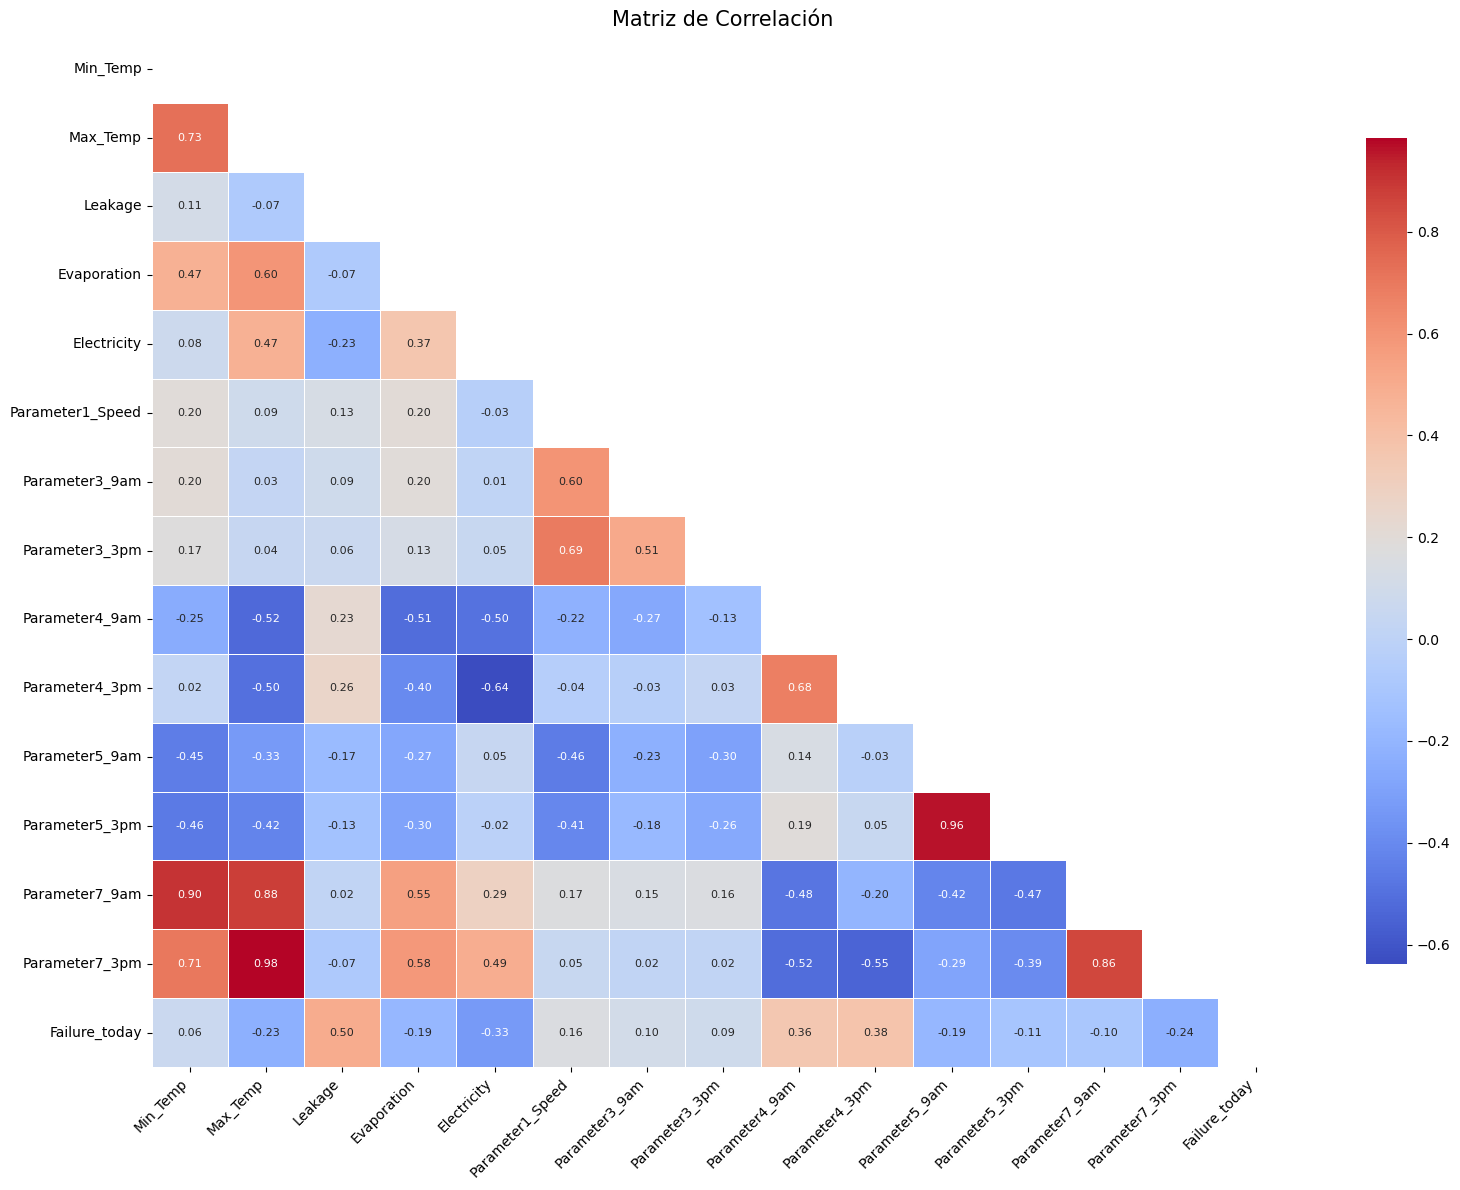

 Variables eliminadas por alta correlación y redundancia:
- 'Parameter7_9am' y 'Parameter7_3pm': Altamente correlacionadas con Min_Temp y Max_Temp, respectivamente.
- 'Parameter5_9am': Muy correlacionada con 'Parameter5_3pm', y esta última es más representativa de la presión a lo largo del día.


In [8]:
# Filtrar columnas numéricas que no sean dummies de Location
numeric_cols_filtradas = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if not col.startswith('Location_')]

# Crear matriz de correlación filtrada
corr_filtrada = df[numeric_cols_filtradas].corr()

# Crear la máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Visualizar la matriz de correlación
plt.figure(figsize=(16, 12))  # Tamaño amplio para mejor lectura
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    mask=mask,
    linewidths=0.5,
    annot_kws={'size': 8},
    cbar_kws={"shrink": .8}
)
plt.title('Matriz de Correlación', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rota etiquetas para evitar encimamiento
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Eliminación de variables altamente correlacionadas y redundantes
df.drop(columns=["Parameter7_9am", "Parameter7_3pm", "Parameter5_9am"], inplace=True)
dfcopy1.drop(columns=["Parameter7_9am", "Parameter7_3pm", "Parameter5_9am"], inplace=True)
print(" Variables eliminadas por alta correlación y redundancia:")
print("- 'Parameter7_9am' y 'Parameter7_3pm': Altamente correlacionadas con Min_Temp y Max_Temp, respectivamente.")
print("- 'Parameter5_9am': Muy correlacionada con 'Parameter5_3pm', y esta última es más representativa de la presión a lo largo del día.")


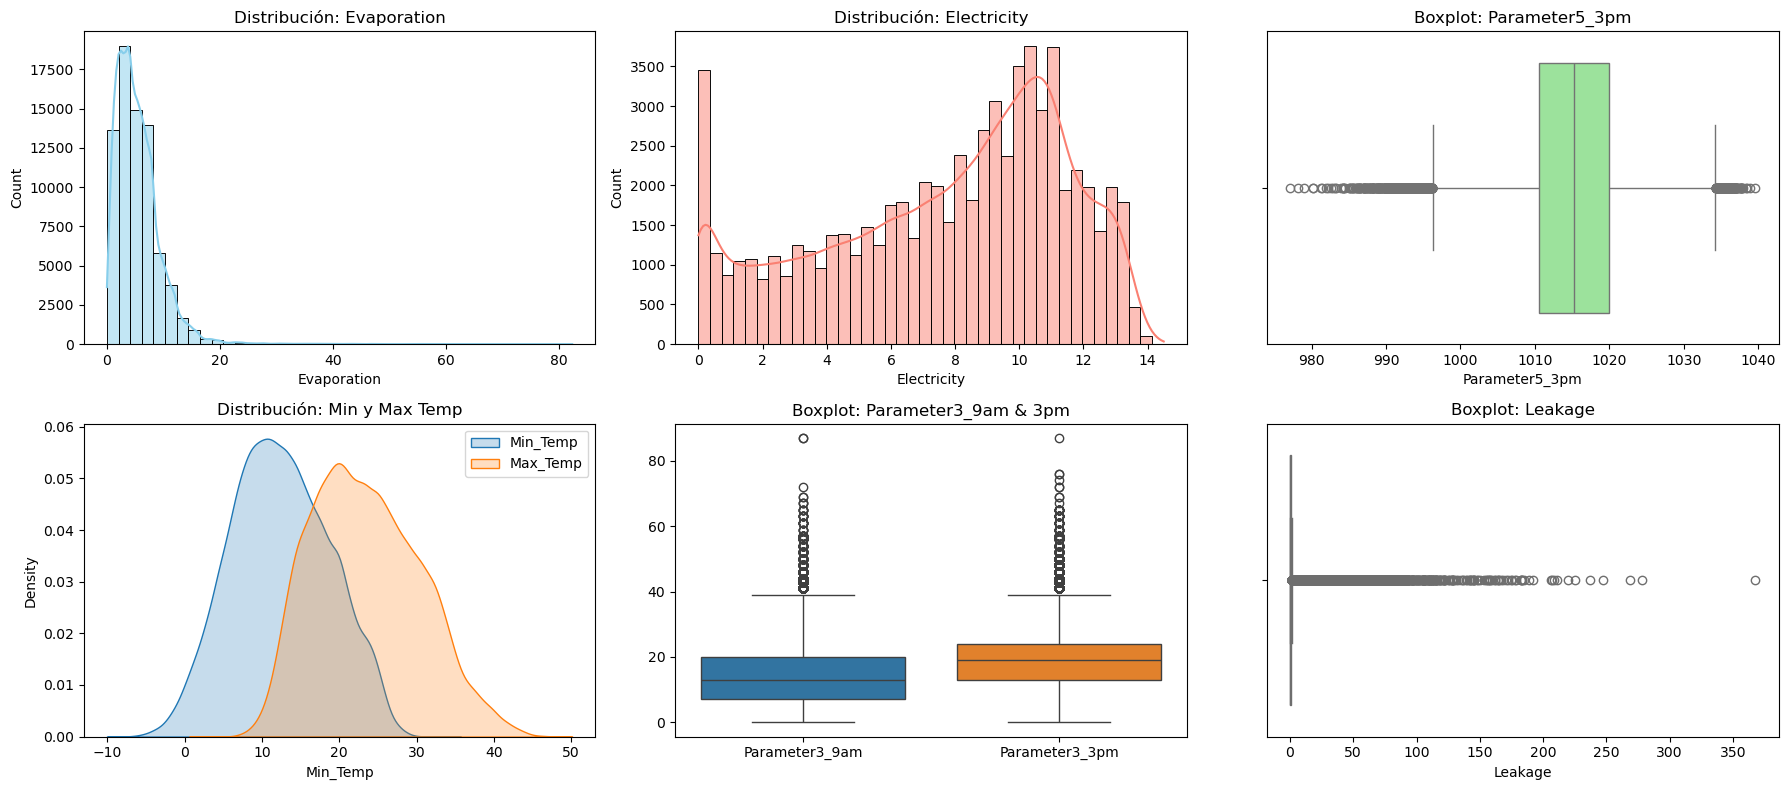


Observaciones a partir de los gráficos:

- La variable 'Evaporation' presenta una distribución sesgada a la derecha con varios outliers visibles, lo que indica que hay días con una evaporación anormalmente alta.
- 'Electricity' muestra un patrón de distribución más disperso y algunos valores elevados por encima de 12, que pueden representar situaciones inusuales de consumo energético.
- El boxplot de 'Parameter5_3pm' revela outliers en ambos extremos, aunque el grueso de los datos se concentra en un rango estable.
- La comparación entre 'Min_Temp' y 'Max_Temp' permite observar claramente la diferencia entre temperaturas mínimas y máximas diarias.
- 'Parameter3_9am' y 'Parameter3_3pm' muestran una cantidad significativa de outliers, lo cual podría indicar sensores sensibles o condiciones extremas ocasionales.
- Se eliminó la variable 'Leakage' porque actúa como un predictor casi perfecto del fallo de la máquina, generando una estimación con R² cercano a 1. Esto indica que su inclusión 

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))  # 2 filas, 3 columnas

# Evaporation
sns.histplot(df['Evaporation'], bins=40, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución: Evaporation')

# Electricity
sns.histplot(df['Electricity'], bins=40, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribución: Electricity')

# Parameter5_3pm
sns.boxplot(data=df, x='Parameter5_3pm', ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Boxplot: Parameter5_3pm')

# Min y Max Temp
sns.kdeplot(df['Min_Temp'], ax=axes[1, 0], fill=True, label='Min_Temp')
sns.kdeplot(df['Max_Temp'], ax=axes[1, 0], fill=True, label='Max_Temp')
axes[1, 0].set_title('Distribución: Min y Max Temp')
axes[1, 0].legend()

# Parameter3_9am y 3pm
sns.boxplot(data=df[['Parameter3_9am', 'Parameter3_3pm']], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot: Parameter3_9am & 3pm')

# Leakage
sns.boxplot(data=df, x='Leakage', ax=axes[1, 2], color='lightcoral')
axes[1, 2].set_title('Boxplot: Leakage')

plt.tight_layout()
plt.show()

print("""
Observaciones a partir de los gráficos:

- La variable 'Evaporation' presenta una distribución sesgada a la derecha con varios outliers visibles, lo que indica que hay días con una evaporación anormalmente alta.
- 'Electricity' muestra un patrón de distribución más disperso y algunos valores elevados por encima de 12, que pueden representar situaciones inusuales de consumo energético.
- El boxplot de 'Parameter5_3pm' revela outliers en ambos extremos, aunque el grueso de los datos se concentra en un rango estable.
- La comparación entre 'Min_Temp' y 'Max_Temp' permite observar claramente la diferencia entre temperaturas mínimas y máximas diarias.
- 'Parameter3_9am' y 'Parameter3_3pm' muestran una cantidad significativa de outliers, lo cual podría indicar sensores sensibles o condiciones extremas ocasionales.
- Se eliminó la variable 'Leakage' porque actúa como un predictor casi perfecto del fallo de la máquina, generando una estimación con R² cercano a 1. Esto indica que su inclusión contamina el modelo, ya que anticipa directamente la variable objetivo, distorsionando la interpretación y la contribución de las demás variables explicativas.""")

# Eliminar 'Leakage' después de graficar
df.drop(columns=['Leakage'], inplace=True)
dfcopy1.drop(columns=['Leakage'], inplace=True)

2. Ejecute un modelo de probabilidad lineal (MCO) que permita explicar la probabilidad de que un dia se reporte fallo medido por sensor, a partir de las informacion disponible. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

In [10]:
# Crear el DataFrame modelo a partir del DataFrame limpio actual
df_model = df.copy()
# y: variable dependiente (lo que queremos predecir)
y = df_model['Failure_today']

# X: todas las demás variables (excepto la variable objetivo)
X = df_model.drop(columns=['Failure_today'])

# Agregamos constante (intercepto) al modelo
X = sm.add_constant(X)

# Eliminamos filas con posibles NaN (por seguridad)
Xy = pd.concat([y, X], axis=1).dropna()
y_clean = Xy['Failure_today']
X_clean = Xy.drop(columns=['Failure_today'])

# Ejecutamos el modelo
modelo = sm.OLS(y_clean, X_clean).fit()

# Mostramos el resumen
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          Failure_today   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     518.1
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:02:41   Log-Likelihood:                -24513.
No. Observations:               65434   AIC:                         4.913e+04
Df Residuals:                   65384   BIC:                         4.958e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

In [11]:
# Crear el DataFrame modelo a partir del DataFrame limpio actual y eliminar columnas conflictivas
df_model2 = df.drop(columns=['Electricity', 'Evaporation'])

# y: variable dependiente (lo que queremos predecir)
y = df_model2['Failure_today']

# X: todas las demás variables (excepto la variable objetivo)
X = df_model2.drop(columns=['Failure_today'])

# Agregar constante (intercepto) al modelo
X = sm.add_constant(X)

# Unir y eliminar posibles filas con NaN por seguridad
Xy = pd.concat([y, X], axis=1).dropna()
y_clean2 = Xy['Failure_today']
X_clean2 = Xy.drop(columns=['Failure_today'])

# Ejecutar modelo Probit
modelo_probit = sm.Probit(y_clean2, X_clean2)
probit_result = modelo_probit.fit(cov_type="HC0")

# Mostrar resumen del modelo
print(probit_result.summary())

# Mostrar efectos marginales
mfx_probit = probit_result.get_margeff()
print(mfx_probit.summary())


Optimization terminated successfully.
         Current function value: 0.356680
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               119590
Model:                         Probit   Df Residuals:                   119526
Method:                           MLE   Df Model:                           63
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.3248
Time:                        23:02:42   Log-Likelihood:                -42655.
converged:                       True   LL-Null:                       -63172.
Covariance Type:                  HC0   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      21.3376      0.953     22.381      0.000      19.469   

4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 


In [12]:
# Crear el DataFrame modelo a partir del DataFrame limpio actual
df_model3 = df.drop(columns=['Electricity', 'Evaporation'])

# y: variable dependiente (lo que queremos predecir)
y = df_model3['Failure_today']

# X: todas las demás variables (excepto la variable objetivo)
X = df_model3.drop(columns=['Failure_today'])

# Agregar constante (intercepto) al modelo
X = sm.add_constant(X)

# Unir y eliminar posibles filas con NaN por seguridad
Xy = pd.concat([y, X], axis=1).dropna()
y_clean3 = Xy['Failure_today']
X_clean3 = Xy.drop(columns=['Failure_today'])

# Ejecutar modelo Logit
modelo_logit = sm.Logit(y_clean3, X_clean3)
logit_result = modelo_logit.fit(cov_type="HC0")

# Mostrar resumen del modelo
print(logit_result.summary())

# Mostrar efectos marginales
mfx_logit = logit_result.get_margeff()
print(mfx_logit.summary())


Optimization terminated successfully.
         Current function value: 0.355396
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               119590
Model:                          Logit   Df Residuals:                   119526
Method:                           MLE   Df Model:                           63
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.3272
Time:                        23:02:48   Log-Likelihood:                -42502.
converged:                       True   LL-Null:                       -63172.
Covariance Type:                  HC0   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      36.7051      1.675     21.911      0.000      33.422   

6. Agregue la data a nivel mensual, usando la data promedio de las variables (ignorando aquellas categoricas, como la direccion del viento). En particular, genere una variable que cuente la cantidad de fallos observados en un mes, utilice un valor de 0 si en ese mes no se reporto fallos en ningun dia. Use un modelo Poisson para explicar el numero de fallas por mes. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

In [13]:
# Paso 1: Asegurar formato de fecha y extraer año y mes
dfcopy1['Year'] = dfcopy1['Date'].dt.year
dfcopy1['Month'] = dfcopy1['Date'].dt.month

# Paso 2: Reconstruir variable Location desde las dummies
location_cols = [col for col in dfcopy1.columns if col.startswith('Location_')]

if location_cols:
    dfcopy1['Location'] = dfcopy1[location_cols].idxmax(axis=1).str.replace('Location_', '').astype(int)
    dfcopy1.drop(columns=location_cols, inplace=True)

# Paso 3: Eliminar columnas de dirección y otras no deseadas
cols_a_eliminar = [
    'Parameter1_Dir_region_W',
    'Parameter2_9am_region_N', 'Parameter2_9am_region_S', 'Parameter2_9am_region_W',
    'Parameter2_3pm_region_N', 'Parameter2_3pm_region_S', 'Parameter2_3pm_region_W',
    'Evaporation', 'Electricity',
    'Parameter1_Dir_region_N', 'Parameter1_Dir_region_S'
]
dfcopy1.drop(columns=[col for col in cols_a_eliminar if col in dfcopy1.columns], inplace=True)

# Paso 4: Agrupar por Year, Month y Location
cols_promedio = ['Min_Temp', 'Max_Temp', 'Parameter1_Speed', 'Parameter3_9am',
                 'Parameter3_3pm', 'Parameter4_9am', 'Parameter4_3pm', 'Parameter5_3pm']

df_mensual = dfcopy1.groupby(['Year', 'Month', 'Location']).agg({
    **{col: 'mean' for col in cols_promedio},
    'Failure_today': 'sum'
}).reset_index()

# Paso 5: Crear columna 'Mes' en formato 'YYYY-MM' 
df_mensual['Mes'] = df_mensual['Year'].astype(str) + '-' + df_mensual['Month'].astype(str).str.zfill(2)

# Paso 6: Ajustar modelo Poisson con fórmula (C(Location) como variable categórica)
poisson_model = smf.poisson(
    formula="Failure_today ~ C(Location) + Min_Temp + Max_Temp + Parameter1_Speed + Parameter3_9am + Parameter3_3pm + Parameter4_9am + Parameter4_3pm + Parameter5_3pm",
    data=df_mensual
).fit()

# Paso 7: Mostrar resumen
print(poisson_model.summary())

Optimization terminated successfully.
         Current function value: 2.243287
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:          Failure_today   No. Observations:                 4037
Model:                        Poisson   Df Residuals:                     3986
Method:                           MLE   Df Model:                           50
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.3332
Time:                        23:02:53   Log-Likelihood:                -9056.2
converged:                       True   LL-Null:                       -13582.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.9085      2.867      8.340      0.000      18.290      29.527
C(Locati

7. Determine sobre dispersion en la data y posible valor optimo de alpha para un modelo Binomial Negativa.

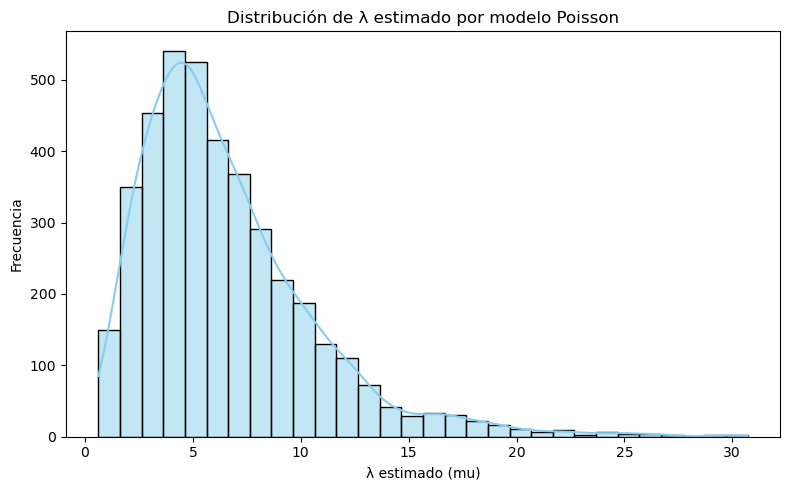

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              2.598
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                       0.107
Time:                        23:02:53   Log-Likelihood:                         -7134.4
No. Observations:                4037   AIC:                                  1.427e+04
Df Residuals:                    4036   BIC:                                  1.428e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
# Paso 1: Obtener el lambda estimado del modelo Poisson
df_mensual['plambda'] = poisson_model.predict(df_mensual)

# Paso 2: Graficar la distribución de los valores esperados (λ)
plt.figure(figsize=(8, 5))
sns.histplot(data=df_mensual, x="plambda", bins=30, kde=True, color='skyblue')
plt.title("Distribución de λ estimado por modelo Poisson")
plt.xlabel("λ estimado (mu)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Paso 3: Calcular variable auxiliar para test de sobre-dispersión
aux = ((df_mensual['Failure_today'] - df_mensual['plambda'])**2 - df_mensual['plambda']) / df_mensual['plambda']

# Paso 4: Regresión auxiliar (estima alpha implícitamente)
auxr = sm.OLS(aux, df_mensual['plambda']).fit()

# Paso 5: Resultado de la regresión auxiliar
print(auxr.summary())

8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder a la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Failure_today   No. Observations:                 4037
Model:                            GLM   Df Residuals:                     3986
Model Family:        NegativeBinomial   Df Model:                           50
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11238.
Date:                Thu, 24 Apr 2025   Deviance:                       1058.5
Time:                        23:02:53   Pearson chi2:                     741.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2858
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            25.3367      8.26

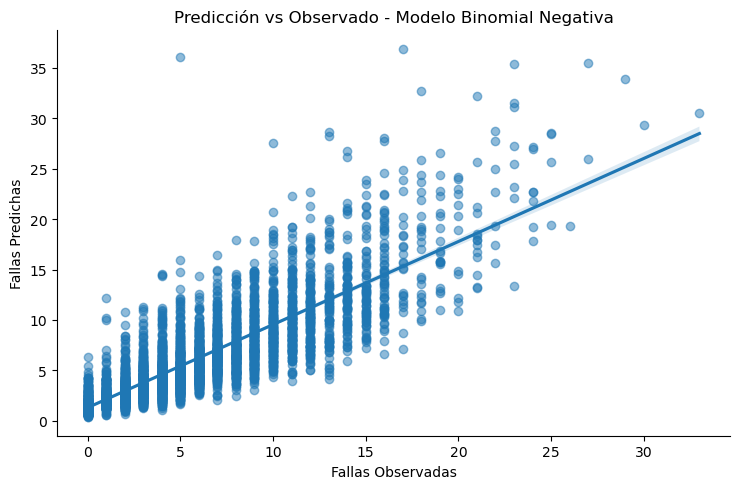

In [15]:
# Paso 1: Estimar modelo Binomial Negativa (con alpha ajustado automáticamente)
neg_bin_model = smf.glm(
    formula="Failure_today ~ C(Location) + Min_Temp + Max_Temp + Parameter1_Speed + \
             Parameter3_9am + Parameter3_3pm + Parameter4_9am + Parameter4_3pm + Parameter5_3pm",
    data=df_mensual,
    family=sm.families.NegativeBinomial()
).fit()

# Paso 2: Mostrar resumen
print(neg_bin_model.summary())

# Paso 3: Generar predicciones y graficar
df_mensual['ypred'] = neg_bin_model.predict(df_mensual)

# Gráfico de valores predichos vs observados 
sns.lmplot(data=df_mensual, x='Failure_today', y='ypred', height=5, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("Predicción vs Observado - Modelo Binomial Negativa")
plt.xlabel("Fallas Observadas")
plt.ylabel("Fallas Predichas")
plt.tight_layout()
plt.show()
